


##### Let's get started!

We'll start by running some imports, and loading the dataset. For this project you are free to make further imports throughout the notebook as you wish. 

In [ ]:
import tensorflow as tf
from scipy.io import loadmat
import numpy as np
from tensorflow.keras.layers import Dense, Flatten,Conv2D, BatchNormalization, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Load the dataset from your Drive folder

train = loadmat('/content/gdrive/My Drive/Colab Notebooks/train_32x32.mat')
test = loadmat('/content/gdrive/My Drive/Colab Notebooks/test_32x32.mat')

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [ ]:
#train.keys()
train_x=train['X']
train_y= train['y']
#test.keys()
test_x=test['X']
test_y=test['y']
train_x.shape

(32, 32, 3, 73257)

In [ ]:
train_x= np.moveaxis(train_x, -1, 0)
test_x = np.moveaxis(test_x, -1, 0)

In [ ]:
train_y = np.where(train_y==10, 0, train_y)
test_y = np.where(test_y==10, 0, test_y)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


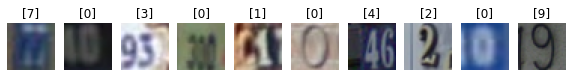

In [ ]:
import random
indices = random.sample( range(0,train_x.shape[0]), 10 )
fig, axis = plt.subplots(1, 10, figsize=(10,1))

for i in range(10):
    axis[i].set_axis_off()
    axis[i].imshow(train_x[indices[i]])
    axis[i].set_title(train_y[indices[i]])

In [ ]:
train_x_greyscale = np.mean(train_x, -1, keepdims=True)
test_x_greyscale = np.mean(test_x, -1, keepdims=True)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


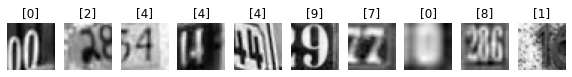

In [ ]:
indices = random.sample( range(0,train_x_greyscale.shape[0]), 10 )
fig, axis = plt.subplots(1, 10, figsize=(10,1))

for i in range(10):
    axis[i].set_axis_off()
    axis[i].imshow(train_x_greyscale[indices[i],:,:,0], cmap='gray')
    axis[i].set_title(train_y[indices[i]])

## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different MLP architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._
* Print out the model summary (using the summary() method)
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run. 
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [ ]:
def get_mlp_model():
  model = Sequential([
        Flatten(input_shape=train_x[0].shape),
        Dense(512, activation='relu'),
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
  return model

In [ ]:
model=get_mlp_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_21 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_23 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1290      
Total params: 2,001,546
Trainable params: 2,001,546
Non-trainable params: 0
____________________________________________

In [ ]:
check_path = 'Checkpoint/Best_model'
chkpt = ModelCheckpoint(check_path,
                     save_best_only=True,
                     save_weights_only=True,
                     verbose=False,
                     save_freq='epoch',
                     monitor='val_loss',
                     mode='min')

In [ ]:
EarlyStop = EarlyStopping(patience=15)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_x, train_y, epochs=30, batch_size=64, validation_split=0.15, callbacks=[chkpt, EarlyStop])

Epoch 1/30
973/973 [==============================] - 4s 3ms/step - loss: 10.8595 - accuracy: 0.2206 - val_loss: 1.6167 - val_accuracy: 0.4521
Epoch 2/30
973/973 [==============================] - 3s 3ms/step - loss: 1.5954 - accuracy: 0.4853 - val_loss: 1.4071 - val_accuracy: 0.5559
Epoch 3/30
973/973 [==============================] - 3s 3ms/step - loss: 1.3710 - accuracy: 0.5667 - val_loss: 1.2854 - val_accuracy: 0.5982
Epoch 4/30
973/973 [==============================] - 3s 3ms/step - loss: 1.3080 - accuracy: 0.5895 - val_loss: 1.2319 - val_accuracy: 0.6085
Epoch 5/30
973/973 [==============================] - 3s 3ms/step - loss: 1.2286 - accuracy: 0.6192 - val_loss: 1.1176 - val_accuracy: 0.6519
Epoch 6/30
973/973 [==============================] - 3s 3ms/step - loss: 1.1713 - accuracy: 0.6378 - val_loss: 1.2816 - val_accuracy: 0.6113
Epoch 7/30
973/973 [==============================] - 3s 3ms/step - loss: 1.1614 - accuracy: 0.6403 - val_loss: 1.0929 - val_accuracy: 0.6599
Epoch

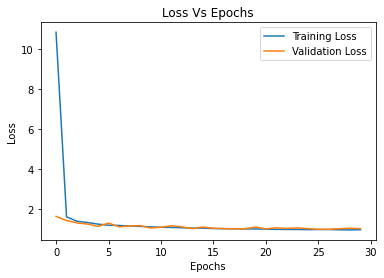

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss Vs Epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

## 3. CNN neural network classifier

* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [ ]:
 def get_cnn_model(): 
   cnn_model = Sequential([
        Conv2D(16, (3,3), padding='same', activation='relu', input_shape=train_x[0].shape),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Conv2D(16, (3,3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Conv2D(16, (3,3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax')
      ])
   return model

In [ ]:
cnn_model=get_cnn_model()
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_21 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_23 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1290      
Total params: 2,001,546
Trainable params: 2,001,546
Non-trainable params: 0
____________________________________________

In [ ]:
cp_path = 'CNN_Checkpoint/Best_model'
cp = ModelCheckpoint(cp_path,
                     save_best_only=True,
                     save_weights_only=True,
                     verbose=False,
                     save_freq='epoch',
                     monitor='val_loss',
                     mode='min')

In [ ]:
EarlyStop = EarlyStopping(patience=10)

In [ ]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = cnn_model.fit(train_x, train_y, epochs=30, batch_size=64,
                         validation_split=0.15, callbacks=[cp, EarlyStop])

Epoch 1/30
973/973 [==============================] - 4s 4ms/step - loss: 0.8884 - accuracy: 0.7266 - val_loss: 0.9949 - val_accuracy: 0.7034
Epoch 2/30
973/973 [==============================] - 3s 3ms/step - loss: 0.9063 - accuracy: 0.7215 - val_loss: 0.9696 - val_accuracy: 0.7136
Epoch 3/30
973/973 [==============================] - 3s 3ms/step - loss: 0.8789 - accuracy: 0.7307 - val_loss: 0.9692 - val_accuracy: 0.7150
Epoch 4/30
973/973 [==============================] - 3s 3ms/step - loss: 0.8836 - accuracy: 0.7276 - val_loss: 1.0223 - val_accuracy: 0.6947
Epoch 5/30
973/973 [==============================] - 3s 3ms/step - loss: 0.8686 - accuracy: 0.7324 - val_loss: 0.9705 - val_accuracy: 0.7148
Epoch 6/30
973/973 [==============================] - 3s 3ms/step - loss: 0.8802 - accuracy: 0.7275 - val_loss: 1.0446 - val_accuracy: 0.6901
Epoch 7/30
973/973 [==============================] - 3s 3ms/step - loss: 0.8813 - accuracy: 0.7268 - val_loss: 0.9892 - val_accuracy: 0.7027
Epoch 

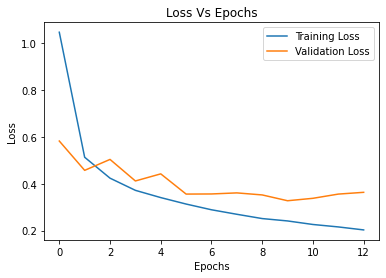

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss Vs Epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

## 4. Get model predictions
* Load the best weights for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

In [ ]:
MLP = get_mlp_model()
MLP.load_weights('Checkpoint/Best_model')

In [ ]:
CNN = get_cnn_model()
CNN.load_weights('CNN_Checkpoint/Best_model')

In [ ]:

def show_predictive_distribution(model):

    num_test_images = test_x.shape[0]

    random_inx = np.random.choice(num_test_images, 5)
    random_test_images = test_x[random_inx, ...]
    random_test_labels = test_y[random_inx, ...]

    predictions = model.predict(random_test_images)

    fig, axes = plt.subplots(5, 2, figsize=(16, 12))
    fig.subplots_adjust(hspace=0.4, wspace=-0.2)

    for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
        axes[i, 0].imshow(np.squeeze(image))
        axes[i, 0].get_xaxis().set_visible(False)
        axes[i, 0].get_yaxis().set_visible(False)
        axes[i, 0].text(10., -1.5, f'Digit {label}')
        axes[i, 1].bar(np.arange(len(prediction)), prediction)
        axes[i, 1].set_xticks(np.arange(len(prediction)))
        axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
    plt.show()

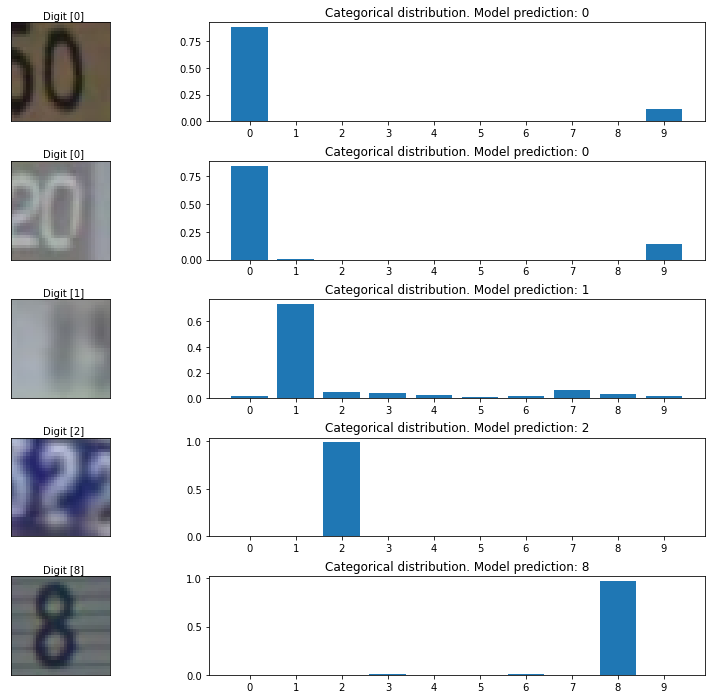

In [ ]:
show_predictive_distribution(MLP)

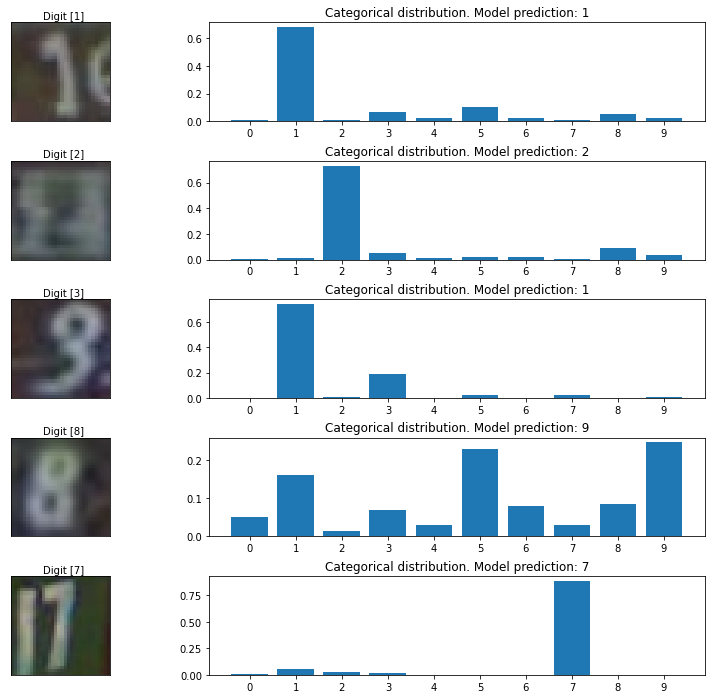

In [ ]:
show_predictive_distribution(CNN)